In [ ]:
from IPython.display import Markdown

#<font color= 'aqua'>Data Clenaning with MySQL</font>      
There are 4 datasets to combine to analyze.  
  - Cab_Data.csv  
  - City.csv  
  - Customer_ID.csv  
  - Transaction_ID.csv  
  

I have used MySQL to join those datasets to make a dataset.  
  - Reference file: Mysql_dataset_import_11082024.sql  




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read the csv file that was created by MySQL.  

In [ ]:
df_original = pd.read_csv('/content/drive/MyDrive/Data_Glacier_Data_Analyst/week2/final_output.csv')

In [ ]:
df_original.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_USD_Month,Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701


In [ ]:
df = df_original.copy()

#<font color= 'aqua'>EDA (Exploratory Data Analysis)</font>     

In [ ]:
df.isnull().sum()

,0
Transaction_ID,0
Date_of_Travel,0
Company,0
City,0
KM_Travelled,0
Price_Charged,0
Cost_of_Trip,0
Customer_ID,0
Payment_Mode,0
Gender,0


**Insight**  
No missing data in the dataset.  

In [ ]:
df.shape

(359392, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    359392 non-null  int64  
 1   Date_of_Travel    359392 non-null  object 
 2   Company           359392 non-null  object 
 3   City              359392 non-null  object 
 4   KM_Travelled      359392 non-null  float64
 5   Price_Charged     359392 non-null  float64
 6   Cost_of_Trip      359392 non-null  float64
 7   Customer_ID       359392 non-null  int64  
 8   Payment_Mode      359392 non-null  object 
 9   Gender            359392 non-null  object 
 10  Age               359392 non-null  int64  
 11  Income_USD_Month  359392 non-null  int64  
 12  Population        359392 non-null  int64  
 13  Users             359392 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 38.4+ MB


In [ ]:
# Set float format to avoid scientific notation
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
df.describe()

,Transaction_ID,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Age,Income_USD_Month,Population,Users
count,"359,392.00","359,392.00","359,392.00","359,392.00","359,392.00","359,392.00","359,392.00","359,392.00","359,392.00"
mean,"10,220,761.19",22.57,423.44,286.19,"19,191.65",35.34,"15,048.82","3,132,198.04","158,365.58"
std,"126,805.80",12.23,274.38,157.99,"21,012.41",12.59,"7,969.41","3,315,194.39","100,850.05"
min,"10,000,011.00",1.90,15.60,19.00,1.00,18.00,"2,000.00","248,968.00","3,643.00"
25%,"10,110,809.75",12.00,206.44,151.20,"2,705.00",25.00,"8,424.00","671,238.00","80,021.00"
50%,"10,221,035.50",22.44,386.36,282.48,"7,459.00",33.00,"14,685.00","1,595,037.00","144,132.00"
75%,"10,330,937.25",32.96,583.66,413.68,"36,078.00",42.00,"21,035.00","8,405,837.00","302,149.00"
max,"10,440,107.00",48.00,"2,048.03",691.20,"60,000.00",65.00,"35,000.00","8,405,837.00","302,149.00"


In [ ]:
df['Company'].value_counts()

,count
Company,
Yellow Cab,274681
Pink Cab,84711


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,205912
Female,153480


In [ ]:
df['Payment_Mode'].value_counts()

,count
Payment_Mode,
Card,215504
Cash,143888


In [ ]:
df.nunique()

,0
Transaction_ID,359392
Date_of_Travel,1095
Company,2
City,19
KM_Travelled,874
Price_Charged,99176
Cost_of_Trip,16291
Customer_ID,46148
Payment_Mode,2
Gender,2


In [ ]:
# extracting only numeric columns

df_num = df.iloc[:, [4, 5, 6, 10, 11, 12]]

In [ ]:
# check for Outliers

q1 = df_num.quantile(0.25)
q3 = df_num.quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

In [ ]:
outliers = df[df_num[(df_num < lower_limit) | (df_num > upper_limit)].any(axis=1)]

[Text(0.5, 1.0, 'Age Distribution')]

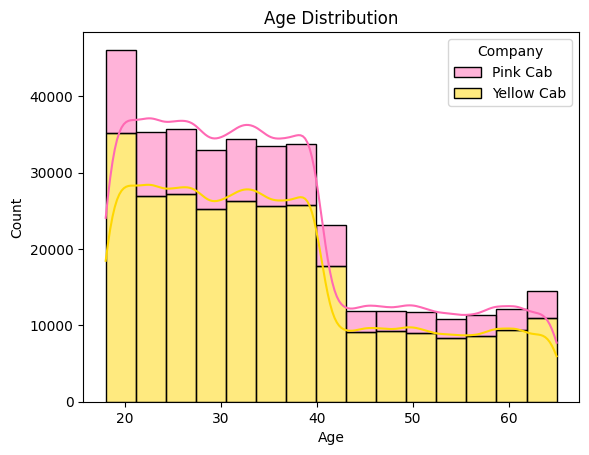

In [ ]:
sns.histplot(data=df, x='Age', hue='Company', kde=True, bins=15, multiple='stack', palette=["#FF69B4", "#FFD700"]).set(title="Age Distribution")

#<font color= 'aqua'>Correlation</font>

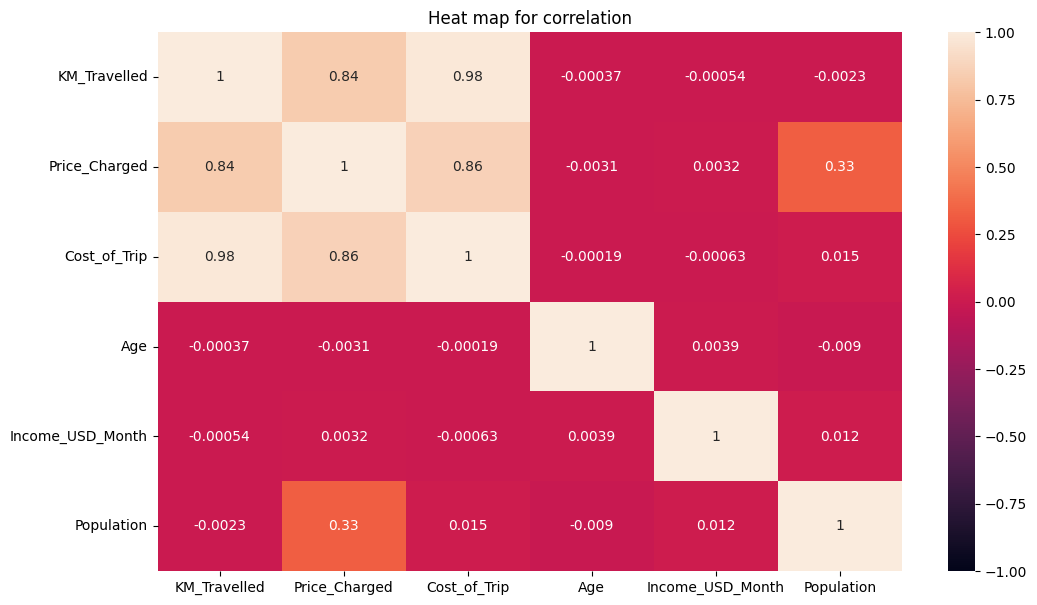

In [ ]:
# Check if there is any correlation between each numerical variable.
plt.figure(figsize = (12, 7))
sns.heatmap(df_num.corr(), annot = True, vmin = -1, vmax = 1)
plt.title('Heat map for correlation')
plt.show()

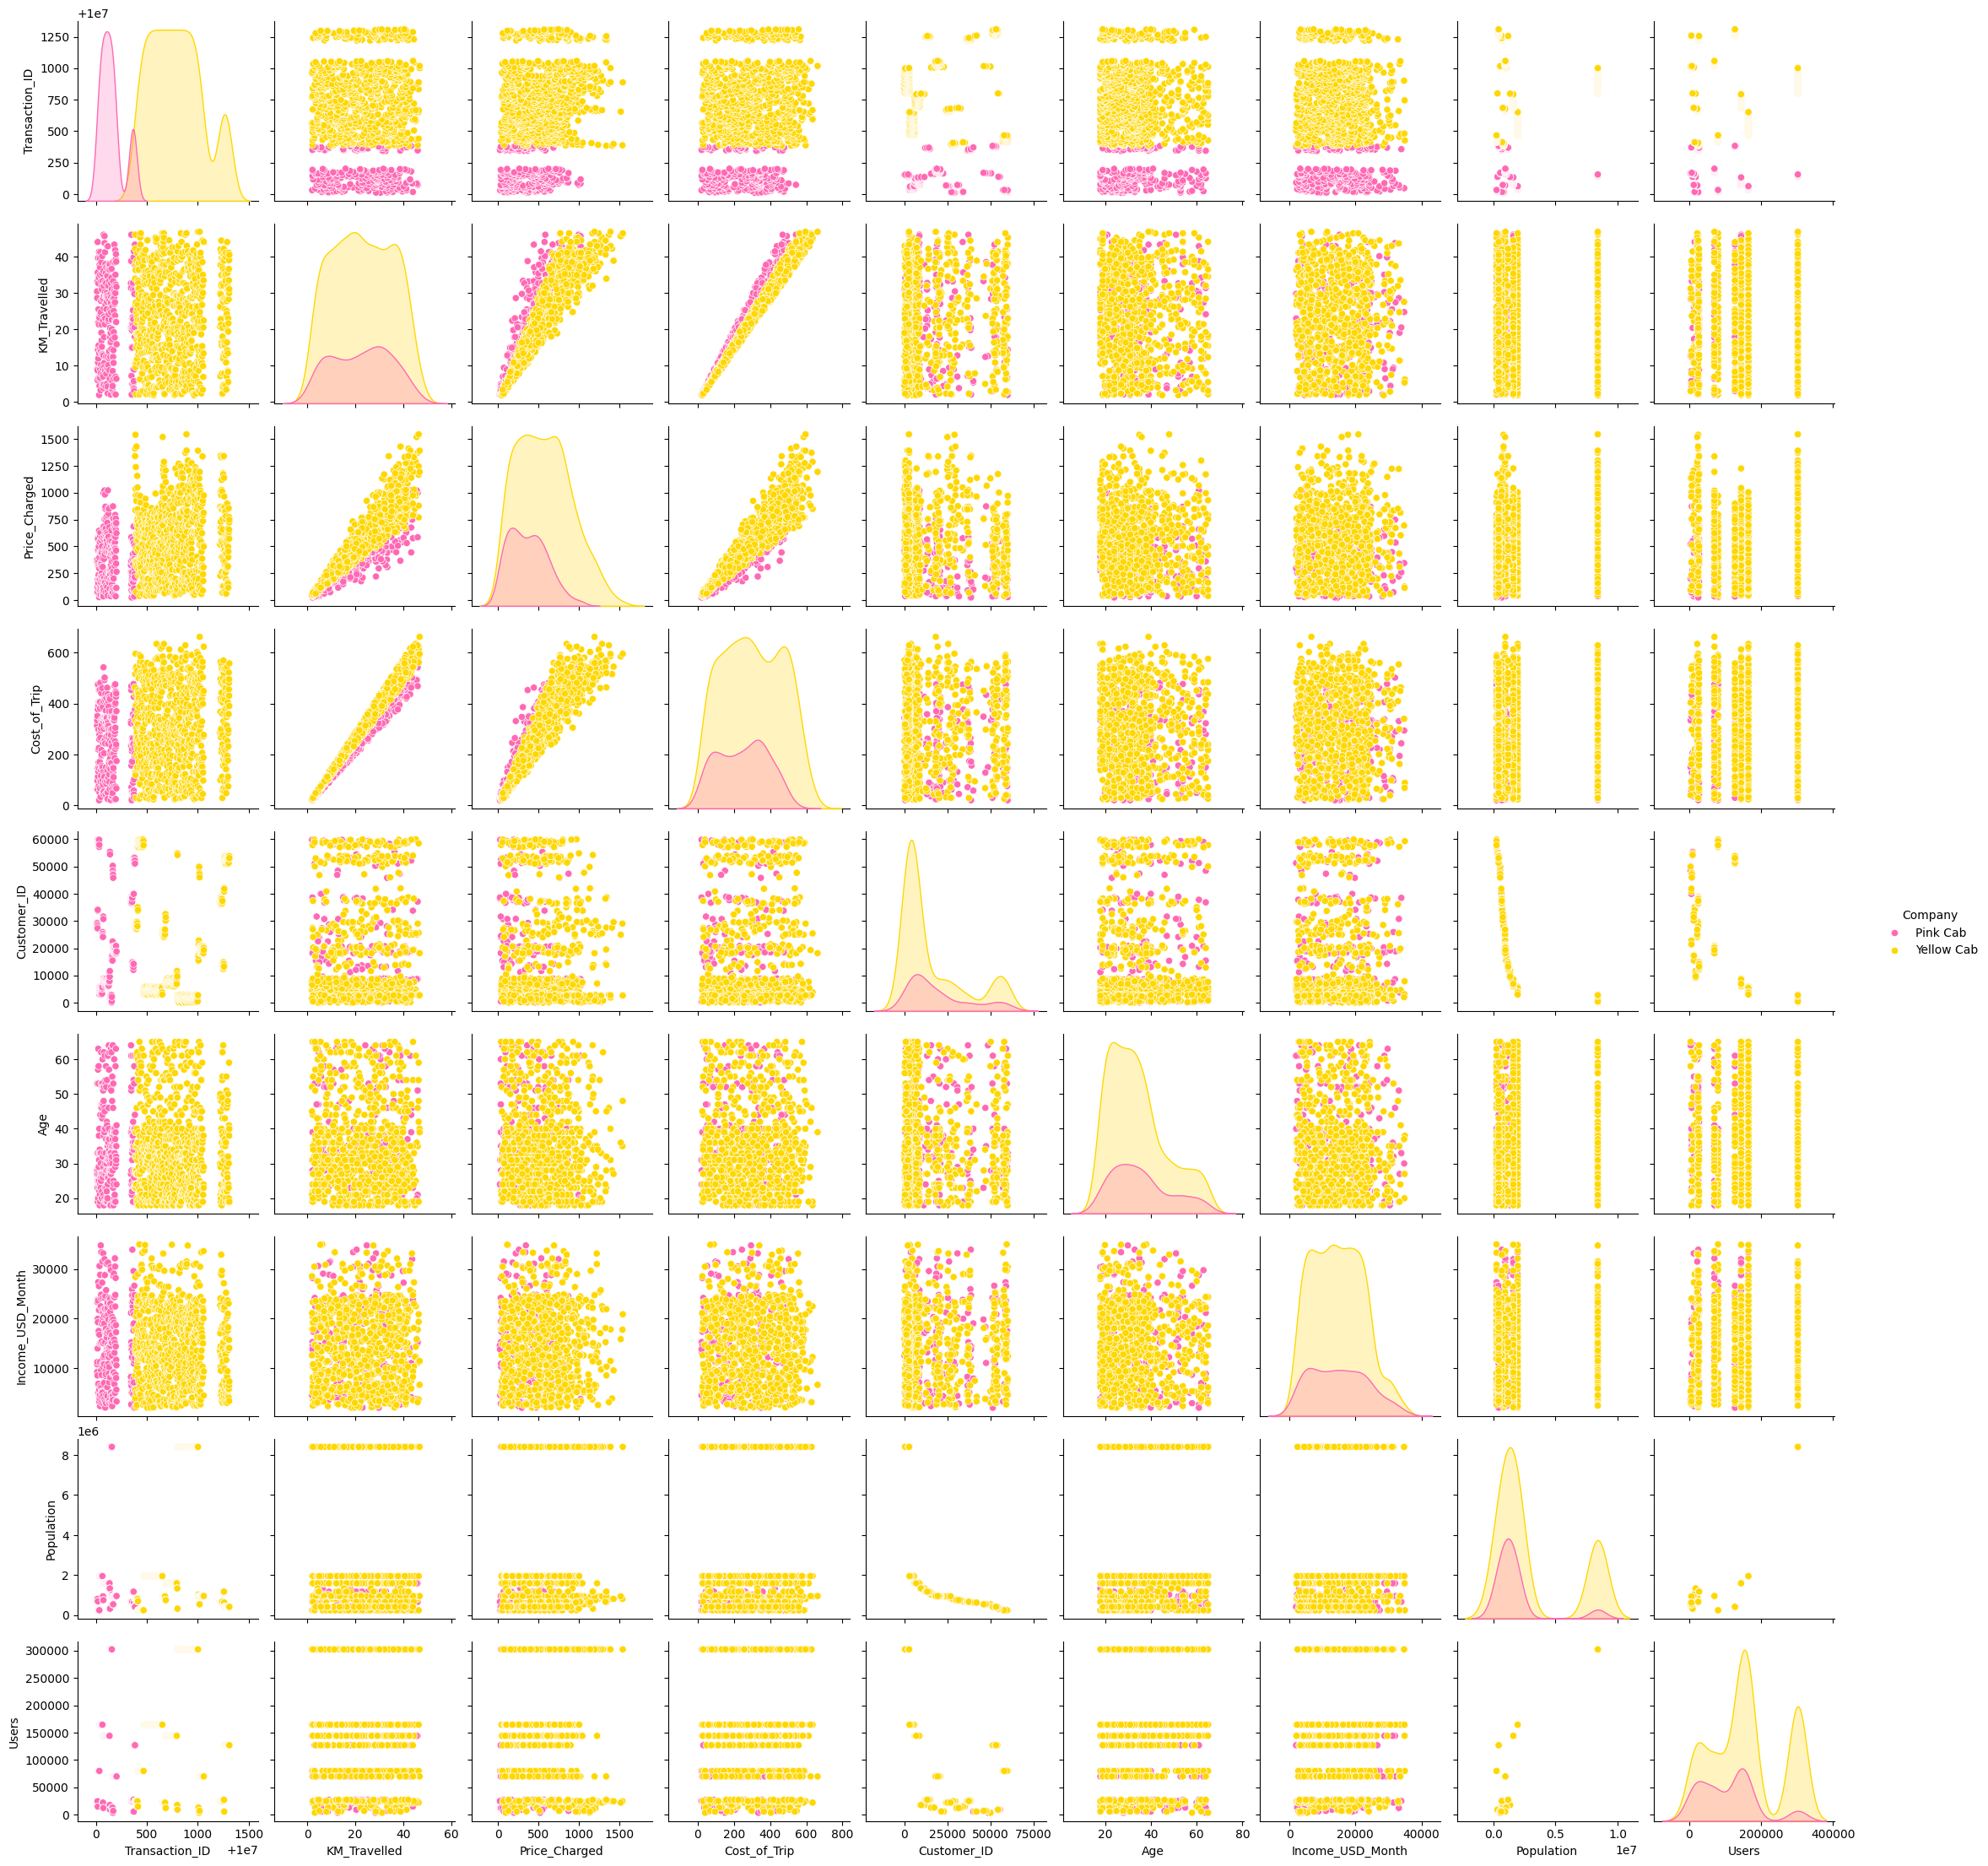

In [ ]:
sns.pairplot(df.head(1000), hue = 'Company', palette=["#FF69B4", "#FFD700"])

<ipython-input-22-6b47430b60d0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Company', y='Price_Charged', palette=["#FF69B4", "#FFD700"]).set(title="How much charged each cab company")


[Text(0.5, 1.0, 'How much charged each cab company')]

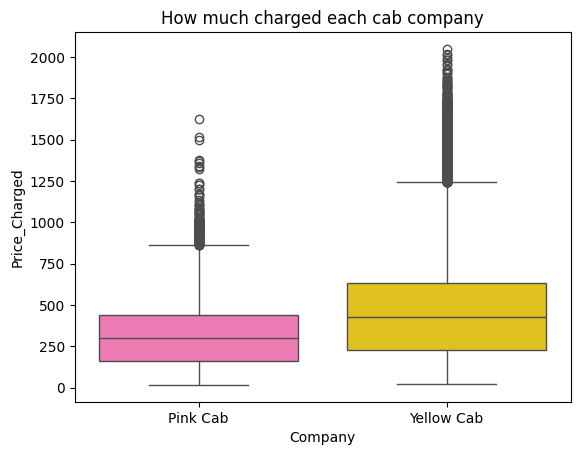

In [ ]:
sns.boxplot(data=df, x='Company', y='Price_Charged', palette=["#FF69B4", "#FFD700"]).set(title="How much charged each cab company")

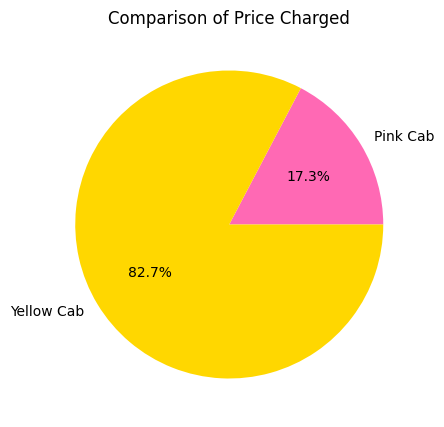

In [ ]:
df.groupby('Company')['Price_Charged'].sum().plot(
    kind='pie',
    title="Comparison of Price Charged",
    ylabel="",
    autopct='%1.1f%%',
    colors=["#FF69B4", "#FFD700"],
    figsize=(5, 5)
)
plt.show()

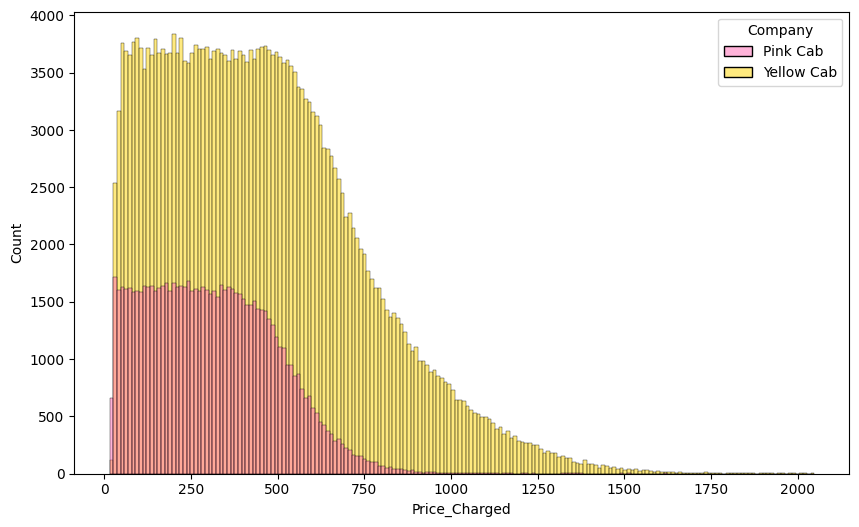

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x="Price_Charged", hue="Company", palette=["#FF69B4", "#FFD700"])
plt.show()

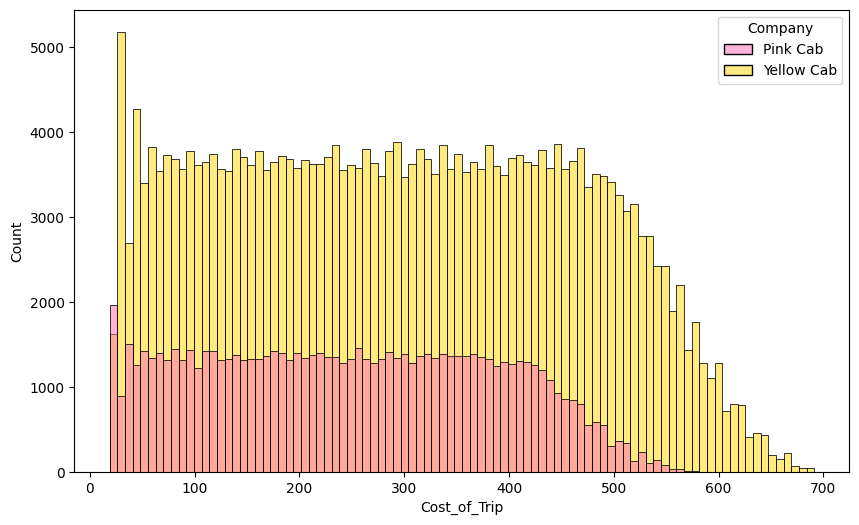

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Cost_of_Trip", hue="Company", palette=["#FF69B4", "#FFD700"])
plt.show()

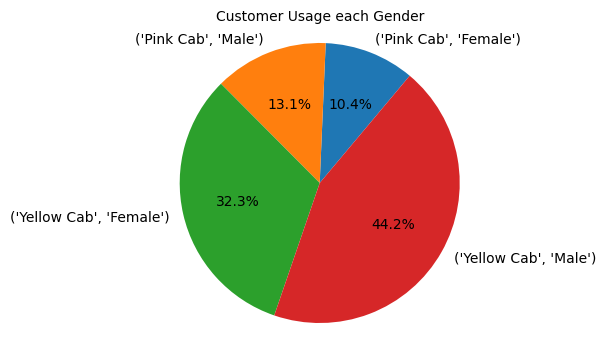

In [ ]:
gender_dist = df.groupby(['Company', 'Gender']).size()

label = gender_dist.index
val = gender_dist.values

figp, axp = plt.subplots(figsize=(5, 4))
axp.pie(val, labels=label, autopct='%1.1f%%', startangle=50)

axp.axis('equal')
plt.title('Customer Usage each Gender', fontsize=10)
plt.show()

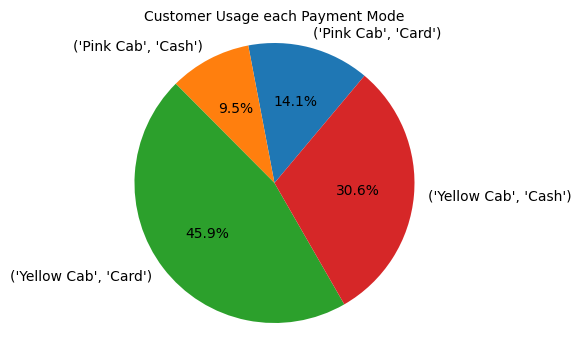

In [ ]:
pmt_dist = df.groupby(['Company', 'Payment_Mode']).size()

label = pmt_dist.index
val = pmt_dist.values

figp, axp = plt.subplots(figsize=(5, 4))
axp.pie(val, labels=label, autopct='%1.1f%%', startangle=50)

axp.axis('equal')
plt.title('Customer Usage each Payment Mode', fontsize=10)
plt.show()

<ipython-input-31-fa7cdff72bd0>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_company_distribution = df.groupby(['Income_Bin', 'Company']).size().unstack()


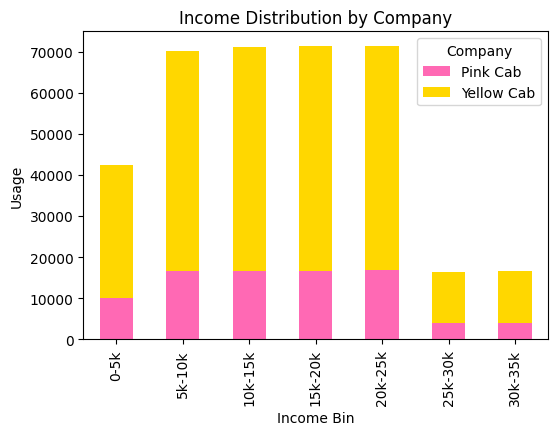

In [ ]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k']

df['Income_Bin'] = pd.cut(df['Income_USD_Month'], bins=bins, labels=labels, right=False)
income_company_distribution = df.groupby(['Income_Bin', 'Company']).size().unstack()
income_company_distribution.plot(
    kind='bar',
    stacked=True,
    title="Income Distribution by Company",
    ylabel="Usage",
    xlabel="Income Bin",
    figsize=(6, 4),
    color=["#FF69B4", "#FFD700"]
)
plt.show()

<Axes: title={'center': 'Which location often use those Cab Companies?'}, xlabel='City', ylabel='frequency of usage'>

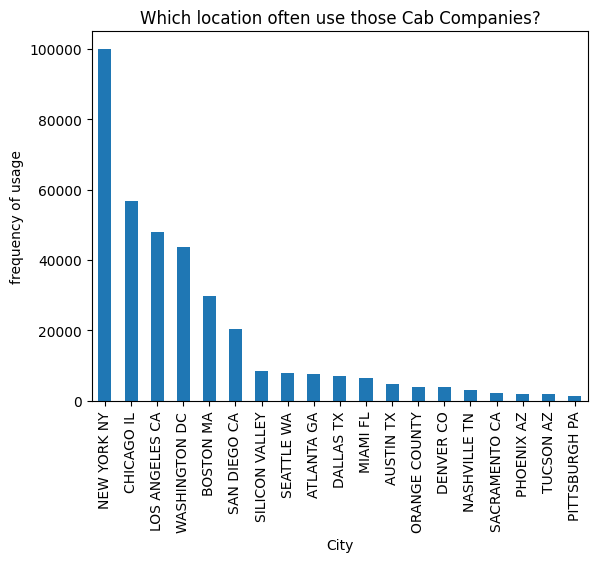

In [ ]:
df['City'].value_counts(ascending = False).plot(kind = 'bar', title="Which location often use those Cab Companies?", ylabel="frequency of usage", xlabel="City")

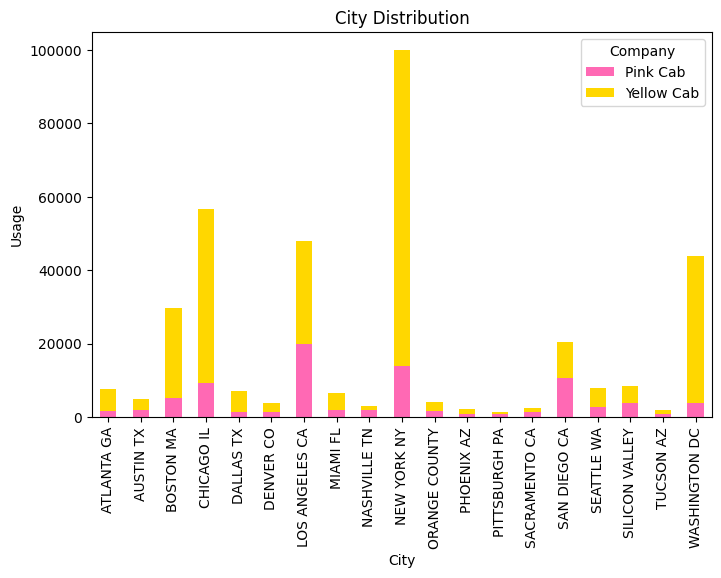

In [ ]:
import matplotlib.pyplot as plt
df.groupby(['City', 'Company']).size().unstack().plot(
    kind='bar',
    stacked=True,
    title="City Distribution",
    ylabel="Usage",
    xlabel="City",
    figsize=(8, 5),
    color=["#FF69B4", "#FFD700"]
)
plt.show()

<ipython-input-34-0a8b50442e2a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Company', y='KM_Travelled', palette=["#FF69B4", "#FFD700"]).set(title="How many distance each cab company")


[Text(0.5, 1.0, 'How many distance each cab company')]

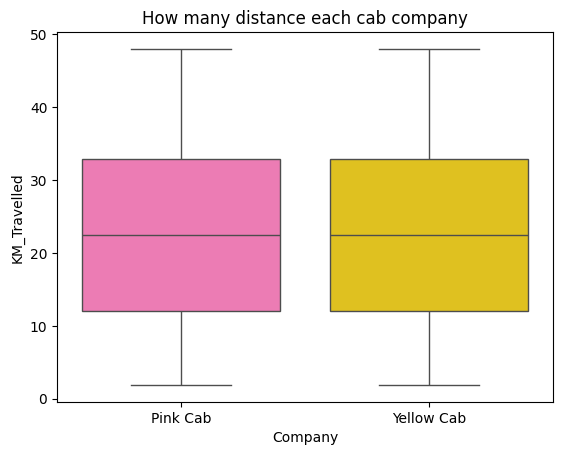

In [ ]:
sns.boxplot(data=df, x='Company', y='KM_Travelled', palette=["#FF69B4", "#FFD700"]).set(title="How many distance each cab company")

<Axes: title={'center': 'Monthly Usage'}, xlabel='Month', ylabel='Frequency of Use'>

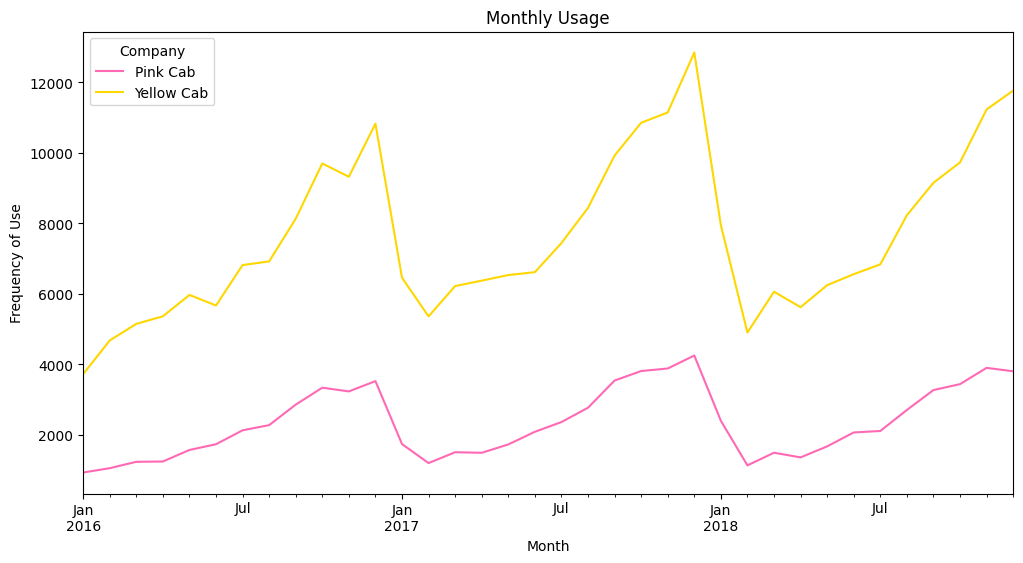

In [ ]:
df['Month'] = pd.to_datetime(df['Date_of_Travel']).dt.to_period('M')
df.groupby(['Month', 'Company']).size().unstack().plot(kind='line', title="Monthly Usage", ylabel="Frequency of Use", xlabel="Month", color=["#FF69B4", "#FFD700"],  figsize=(12, 6))

#<font color= 'aqua'>Feature Engineering</font>



In [ ]:
#grouping of cities by state
df['City'] = df['City'].str.replace(' ', '')
df['State'] = df['City'].str[-2:]
df.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_USD_Month,Population,Users,Income_Bin,Month,State
0,10000011,2016-01-08,Pink Cab,ATLANTAGA,30.45,370.95,313.63,29290,Card,Male,28,10813,814885,24701,10k-15k,2016-01,GA
1,10000012,2016-01-06,Pink Cab,ATLANTAGA,28.62,358.52,334.85,27703,Card,Male,27,9237,814885,24701,5k-10k,2016-01,GA
2,10000013,2016-01-02,Pink Cab,ATLANTAGA,9.04,125.20,97.63,28712,Cash,Male,53,11242,814885,24701,10k-15k,2016-01,GA
3,10000014,2016-01-07,Pink Cab,ATLANTAGA,33.17,377.40,351.60,28020,Cash,Male,23,23327,814885,24701,20k-25k,2016-01,GA
4,10000015,2016-01-03,Pink Cab,ATLANTAGA,8.73,114.62,97.78,27182,Card,Male,33,8536,814885,24701,5k-10k,2016-01,GA


In [ ]:
df['State'].value_counts()

,count
State,
NY,99885
CA,70888
IL,56625
DC,43737
MA,29692
TX,11913
EY,8519
WA,7997
GA,7557


In [ ]:
df['Profit'] = df['Price_Charged'] - df['Cost_of_Trip']

In [ ]:
df.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_USD_Month,Population,Users,Income_Bin,Month,State,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTAGA,30.45,370.95,313.63,29290,Card,Male,28,10813,814885,24701,10k-15k,2016-01,GA,57.31
1,10000012,2016-01-06,Pink Cab,ATLANTAGA,28.62,358.52,334.85,27703,Card,Male,27,9237,814885,24701,5k-10k,2016-01,GA,23.67
2,10000013,2016-01-02,Pink Cab,ATLANTAGA,9.04,125.20,97.63,28712,Cash,Male,53,11242,814885,24701,10k-15k,2016-01,GA,27.57
3,10000014,2016-01-07,Pink Cab,ATLANTAGA,33.17,377.40,351.60,28020,Cash,Male,23,23327,814885,24701,20k-25k,2016-01,GA,25.80
4,10000015,2016-01-03,Pink Cab,ATLANTAGA,8.73,114.62,97.78,27182,Card,Male,33,8536,814885,24701,5k-10k,2016-01,GA,16.84


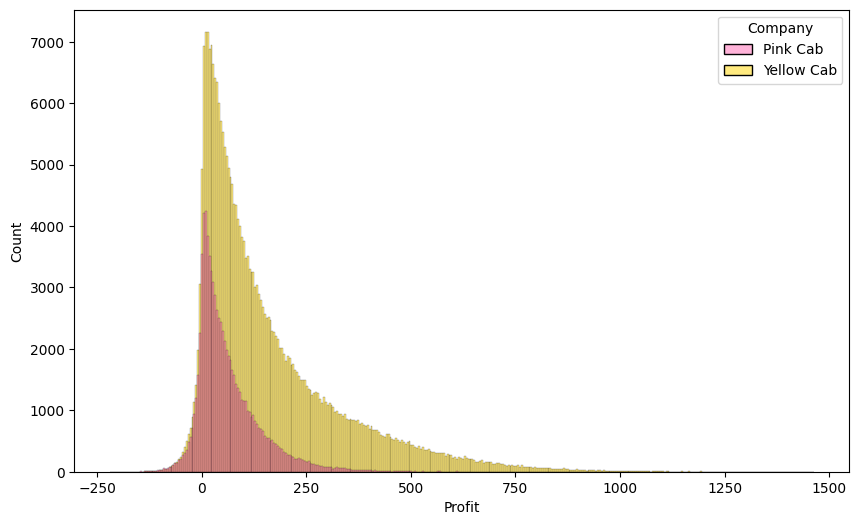

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Profit", hue="Company", palette=["#FF69B4", "#FFD700"])
plt.show()

In [ ]:
print(df.dtypes)
df.head()

Transaction_ID          int64
Date_of_Travel         object
Company                object
City                   object
KM_Travelled          float64
Price_Charged         float64
Cost_of_Trip          float64
Customer_ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income_USD_Month        int64
Population              int64
Users                   int64
Income_Bin           category
Month               period[M]
State                  object
Profit                float64
dtype: object


,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_USD_Month,Population,Users,Income_Bin,Month,State,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTAGA,30.45,370.95,313.63,29290,Card,Male,28,10813,814885,24701,10k-15k,2016-01,GA,57.31
1,10000012,2016-01-06,Pink Cab,ATLANTAGA,28.62,358.52,334.85,27703,Card,Male,27,9237,814885,24701,5k-10k,2016-01,GA,23.67
2,10000013,2016-01-02,Pink Cab,ATLANTAGA,9.04,125.20,97.63,28712,Cash,Male,53,11242,814885,24701,10k-15k,2016-01,GA,27.57
3,10000014,2016-01-07,Pink Cab,ATLANTAGA,33.17,377.40,351.60,28020,Cash,Male,23,23327,814885,24701,20k-25k,2016-01,GA,25.80
4,10000015,2016-01-03,Pink Cab,ATLANTAGA,8.73,114.62,97.78,27182,Card,Male,33,8536,814885,24701,5k-10k,2016-01,GA,16.84


In [ ]:
df['Month'] = pd.to_datetime(df['Date_of_Travel']).dt.to_period('M').astype(str)

In [ ]:
df['Profit'].head()
print(df['Profit'].dtype)

df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

float64


In [ ]:
df = df.dropna(subset=['Profit'])

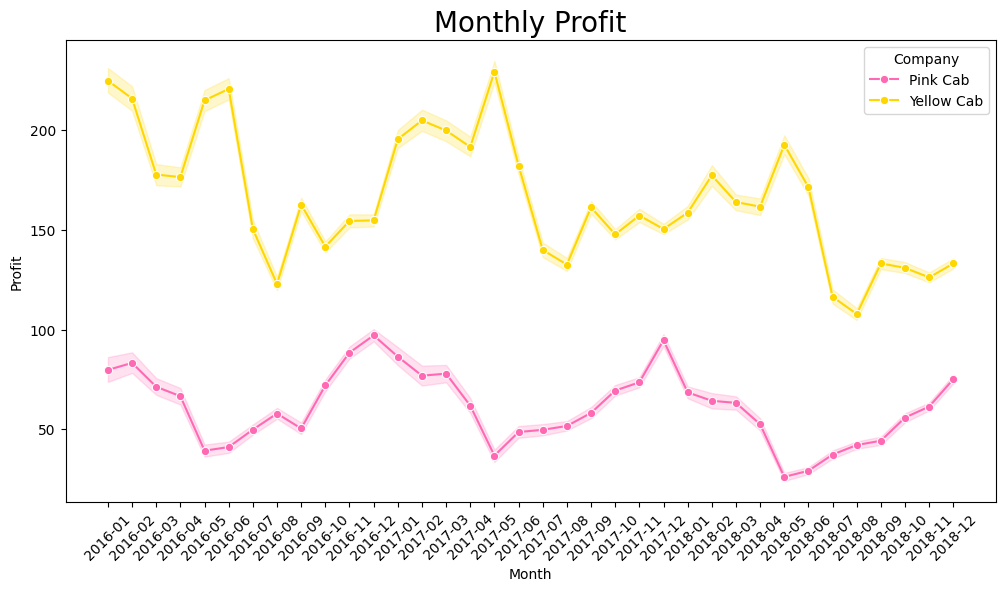

In [ ]:
plt.figure(figsize = (12, 6))
sns.lineplot(data=df, x='Month', y='Profit', hue='Company', marker='o', palette=["#FF69B4", "#FFD700"])
plt.xlabel("Month")
plt.ylabel("Profit")
plt.title("Monthly Profit History", fontsize=20)
plt.xticks(rotation=45)
plt.show()

**Insight**   
The profit of Yellow Cab is getting decreased around July 2017. But overall it is still higher profit.  
On the other hand, the profit of Pink Cab is getting increased after April 2018.  


#<font color= 'aqua'>Hypothesis Testing</font>

**<font color= 'blue'>Hypothesis 1: Is there any difference in profit in terms of Gender?</font> **  
  - H0: There is no difference in terms of Gender in both companies.  
  - H1: There is difference in terms of Gender in both companies.  



In [ ]:
from scipy import stats

In [ ]:
companies = ['Yellow Cab', 'Pink Cab']

In [ ]:
for company in companies:
    print(f"\n{company}:")
    a = df[(df['Gender'] == 'Male') & (df.Company == company)]['Profit']
    b = df[(df['Gender'] == 'Female') & (df.Company == company)]['Profit']
    print(f"Male shape: {a.shape[0]}, Female shape: {b.shape[0]}")

    t_stat, p_value = stats.ttest_ind(a.values, b.values)
    print(f"t-statistic is {t_stat}")
    print(f"p-value is {p_value}")

    alpha = 0.05

    if p_value < alpha:
        print(f'We accept alternative hypothesis (H1) that there is a difference in terms of profit by gender for {company}')
    else:
        print(f'We accept null hypothesis (H0) that there is no difference in terms of profit by gender for {company}')


Yellow Cab:
Male shape: 158681, Female shape: 116000
t-statistic is 10.315494207195322
p-value is 6.060473042494056e-25
We accept alternative hypothesis (H1) that there is a difference in terms of profit by gender for Yellow Cab

Pink Cab:
Male shape: 47231, Female shape: 37480
t-statistic is 1.5754642478511207
p-value is 0.11515305900425798
We accept null hypothesis (H0) that there is no difference in terms of profit by gender for Pink Cab


The result:  
  - Yellow Cab: There is a diffefence in terms of profit by gender.  
  - Pink Cab: There is no difference in terms of profit by gender.  

 **<font color= 'blue'>Hypothesis 2: Is there any difference in profit in terms of Age?</font>**  
  - H0: There is no difference in terms of Age in both companies.  
  - H1: There is difference in terms of Age in both companies.  



In [ ]:
for company in companies:
    print(f"\n{company}:")
    a = df[(df['Age'] <= 42) & (df.Company == company)]['Profit']
    b = df[(df['Age'] > 42) & (df.Company == company)]['Profit']
    print(f"<=42 shape: {a.shape[0]}, >42 shape: {b.shape[0]}")

    t_stat, p_value = stats.ttest_ind(a.values, b.values)
    print(f"t-statistic is {t_stat}")
    print(f"p-value is {p_value}")

    alpha = 0.05

    if p_value < alpha:
        print(f'We accept alternative hypothesis (H1) that there is a difference in terms of profit by Age for {company}')
    else:
        print(f'We accept null hypothesis (H0) that there is no difference in terms of profit by Age for {company}')


Yellow Cab:
<=42 shape: 207117, >42 shape: 67564
t-statistic is 0.6811047969065299
p-value is 0.4958057561993957
We accept null hypothesis (H0) that there is no difference in terms of profit by Age for Yellow Cab

Pink Cab:
<=42 shape: 63843, >42 shape: 20868
t-statistic is 1.2660802615811098
p-value is 0.2054878303129136
We accept null hypothesis (H0) that there is no difference in terms of profit by Age for Pink Cab


The result:  
  - There is no difference in terms of profit by age for both companies.  


**<font color= 'blue'>Hypothesis 3: Is there any difference in profit in terms of Payment Mode?</font>**  
  - H0: There is no difference in terms of Payment Mode in both companies.  
  - H1: There is difference in terms of Payment Mode in both companies.  



In [ ]:
for company in companies:
    print(f"\n{company}:")
    a = df[(df['Payment_Mode'] == 'Card') & (df.Company == company)]['Profit']
    b = df[(df['Payment_Mode'] == 'Cash') & (df.Company == company)]['Profit']
    print(f"Card shape: {a.shape[0]}, Cash shape: {b.shape[0]}")

    t_stat, p_value = stats.ttest_ind(a.values, b.values)
    print(f"t-statistic is {t_stat}")
    print(f"p-value is {p_value}")

    alpha = 0.05

    if p_value < alpha:
        print(f'We accept alternative hypothesis (H1) that there is a difference in terms of profit by Payment Card for {company}')
    else:
        print(f'We accept null hypothesis (H0) that there is no difference in terms of profit by Payment Card for {company}')


Yellow Cab:
Card shape: 164785, Cash shape: 109896
t-statistic is -1.050898652643264
p-value is 0.2933060638298729
We accept null hypothesis (H0) that there is no difference in terms of profit by Payment Card for Yellow Cab

Pink Cab:
Card shape: 50719, Cash shape: 33992
t-statistic is 0.26625096474899373
p-value is 0.7900465828793286
We accept null hypothesis (H0) that there is no difference in terms of profit by Payment Card for Pink Cab


The result:  
  - There is no difference in terms of profit by payment mode for both companies.   
  